In [189]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [190]:
from keras import preprocessing

In [191]:
train_dataset = preprocessing.image_dataset_from_directory("../CD2/CARDATASET/train")

Found 64 files belonging to 3 classes.


In [192]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [193]:
for element in train_dataset.as_numpy_iterator():
    X_train , y_train = element
    print("==============================")

In [194]:
X_train[0]

array([[[ 55.     ,  55.     ,  55.     ],
        [ 55.     ,  55.     ,  55.     ],
        [ 55.     ,  55.     ,  55.     ],
        ...,
        [ 57.     ,  57.     ,  57.     ],
        [ 57.     ,  57.     ,  57.     ],
        [ 57.     ,  57.     ,  57.     ]],

       [[ 55.72461,  55.72461,  55.72461],
        [ 55.72461,  55.72461,  55.72461],
        [ 55.72461,  55.72461,  55.72461],
        ...,
        [ 57.     ,  57.     ,  57.     ],
        [ 57.     ,  57.     ,  57.     ],
        [ 57.     ,  57.     ,  57.     ]],

       [[ 56.     ,  56.     ,  56.     ],
        [ 56.     ,  56.     ,  56.     ],
        [ 56.     ,  56.     ,  56.     ],
        ...,
        [ 57.     ,  57.     ,  57.     ],
        [ 57.     ,  57.     ,  57.     ],
        [ 57.     ,  57.     ,  57.     ]],

       ...,

       [[235.54102, 241.54102, 239.54102],
        [234.62305, 240.62305, 238.62305],
        [233.2107 , 239.2107 , 237.2107 ],
        ...,
        [218.08423, 223.48

In [195]:
y_train

array([1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 0, 0, 1], dtype=int32)

In [196]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


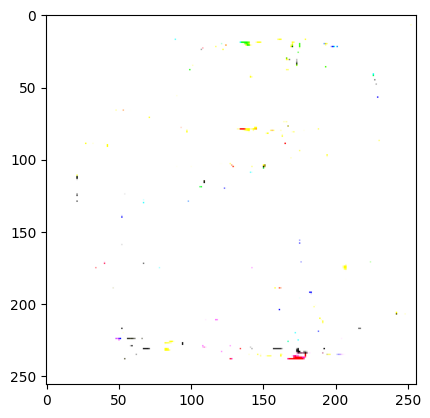

In [197]:
plt.imshow(X_train[2])

In [198]:
import keras

In [199]:
# normalization_layer = keras.layers.Rescaling(1/255)

In [200]:
import matplotlib.pyplot as plt

In [201]:
model = Sequential()

In [202]:
layer1 = Conv2D(filters=256, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3), padding = 'same')
layer2 = MaxPooling2D(pool_size=(2,2))
layer3 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding = 'same')
layer4 = MaxPooling2D(pool_size=(2,2))
layer5 = Conv2D(filters=256, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3), padding = 'same')
layer6 = MaxPooling2D(pool_size=(2,2))
layer7 = Flatten()
layer8 = Dense(units=64, activation='relu')
layer9 = Dense(units=3, activation='softmax')

C:\Users\adars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [203]:

model.add(layer1)
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3), padding = 'same'))
model.add(Dropout(0.3))
model.add(layer2)
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3), padding = 'same'))
model.add(Dropout(0.3))
model.add(layer4)
model.add(layer5)
model.add(layer6)
model.add(layer7)
model.add(layer8)
model.add(layer9)

In [204]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256, 256, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256, 256, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │    16,777,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,966,979 (68.54 MB)

 Trainable params: 17,965,955 (68.53 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [205]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, epochs=1)

In [ ]:
model.save("CDv2.h1")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=CDv1.h1.